In [1]:
import sys
sys.path.append('../utils')
from utils import * 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sql = '''
select * from ATP_ACCURACY
Order by ProductName , Item_Code , WH_Location, Batch_Date;
'''

eu = Email_Utils()
eu.connect_azuredb()
df = eu.fetch_data(sql = sql)

In [2]:
idx = 12
df.ProductName.unique()[idx]

'Q.PEAK DUO BLK ML G10+'

In [3]:
df_filter = df[(df['ProductName'] == df.ProductName.unique()[idx]) & (df['WH_Location'] == df[df['ProductName'] == df.ProductName.unique()[idx]].WH_Location.unique()[0])]

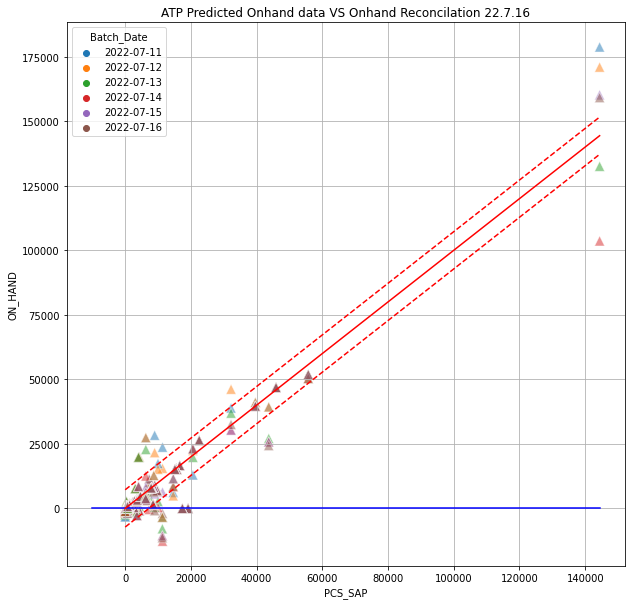

In [7]:
plt.figure(figsize = (10, 10))

sns.lineplot(x = [-10000, df['PCS_SAP'].max()], y = [0, 0], color = 'blue' )
sns.lineplot(x = [0, df['PCS_SAP'].max()], y = [0, df['PCS_SAP'].max()], color = 'red' )
sns.lineplot(x = [0, df['PCS_SAP'].max() ], y = [0 + df['PCS_SAP'].max() * 0.05, df['PCS_SAP'].max() * 1.05], color = 'red',linestyle="dashed")
sns.lineplot(x = [0, df['PCS_SAP'].max() ], y = [0 - df['PCS_SAP'].max() * 0.05, df['PCS_SAP'].max() * 0.95], color = 'red', linestyle="dashed")


sns.scatterplot(x = df['PCS_SAP'] , y = df['ON_HAND'], marker = '^', hue = df['Batch_Date'], alpha = 0.5, s = 100);

plt.title('ATP Predicted Onhand data VS Onhand Reconcilation 22.7.16')
plt.grid()
# plt.xlim(-10000,80000)
# plt.ylim(-10000,80000)

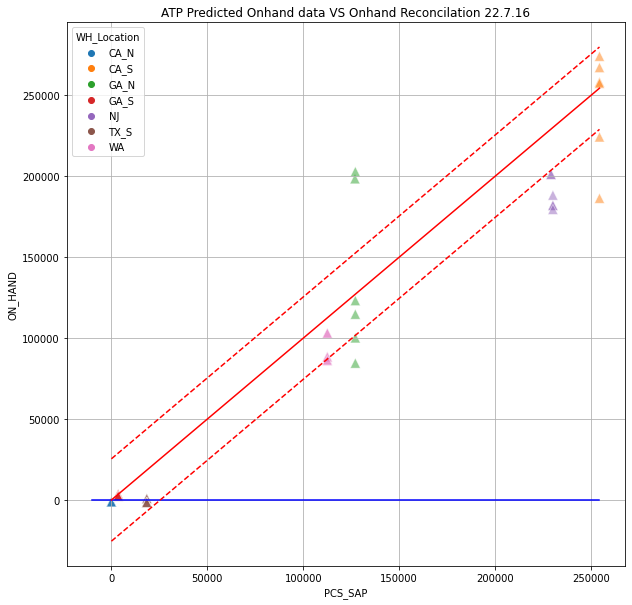

In [47]:
df2 = df.groupby(['Batch_Date','WH_Location']).agg({'ON_HAND' : 'sum', 'PCS_SAP' : 'sum'}).reset_index()
df2


plt.figure(figsize = (10, 10))

sns.lineplot(x = [-10000, df2['PCS_SAP'].max()], y = [0, 0], color = 'blue' )
sns.lineplot(x = [0, df2['PCS_SAP'].max()], y = [0, df2['PCS_SAP'].max()], color = 'red' )
sns.lineplot(x = [0, df2['PCS_SAP'].max() ], y = [0 + df2['PCS_SAP'].max() * 0.1, df2['PCS_SAP'].max() * 1.1], color = 'red',linestyle="dashed")
sns.lineplot(x = [0, df2['PCS_SAP'].max() ], y = [0 - df2['PCS_SAP'].max() * 0.1, df2['PCS_SAP'].max() * 0.9], color = 'red', linestyle="dashed")


sns.scatterplot(x = df2['PCS_SAP'] , y = df2['ON_HAND'], marker = '^', hue = df2['WH_Location'], alpha = 0.5, s = 100);

plt.title('ATP Predicted Onhand data VS Onhand Reconcilation 22.7.16')
plt.grid()

In [14]:
X = df['PCS_SAP'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['ON_HAND'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [19]:
linear_regressor.coef_[0][0]

0.9855913477383283

In [20]:
linear_regressor.intercept_[0]

-300.0450601054167

In [22]:
df['PCS_SAP'].max() * linear_regressor.coef_[0][0]

142303.6211518508

In [53]:
df

,Batch_Date,Item_Code,WH_Location,ProductName,WestEast,ON_HAND,PCS_SAP
0,2022-07-11,12005804C,GA_S,,E,60.0,60
1,2022-07-12,12005804C,GA_S,,E,60.0,60
2,2022-07-13,12005804C,GA_S,,E,60.0,60
3,2022-07-11,12005805C,GA_S,,E,62.0,62
4,2022-07-12,12005805C,GA_S,,E,62.0,62
...,...,...,...,...,...,...,...
1397,2022-07-12,49406540,GA_N,T400H,E,26.0,728
1398,2022-07-13,49406540,GA_N,T400H,E,26.0,728
1399,2022-07-14,49406540,GA_N,T400H,E,754.0,728
1400,2022-07-15,49406540,GA_N,T400H,E,754.0,728


In [108]:
import sys
sys.path.append('../utils')
from utils import * 

sql = '''
select * from ATP_BI_ENDING_ONHAND abeo 
where CW_Type like 'future%' or CW_Type like '%Current'
and Item_Code != '' and WH_Location != 'MISS' and Item_Code not like '99%' and ProductName is not NULL and ProductName != ''
'''

In [109]:
eu = Email_Utils()
eu.connect_azuredb()
df = eu.fetch_data(sql = sql)

In [110]:
df = df.sort_values(by = ['Dates', 'Item_Code', 'WH_Location', 'Batch_Date']).reset_index(drop = True)

In [111]:
df_gp = df.groupby(['Item_Code', 'Dates'
           ]).agg({'ON_HAND' : 'std'}).reset_index()

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Dates', ylabel='ON_HAND'>

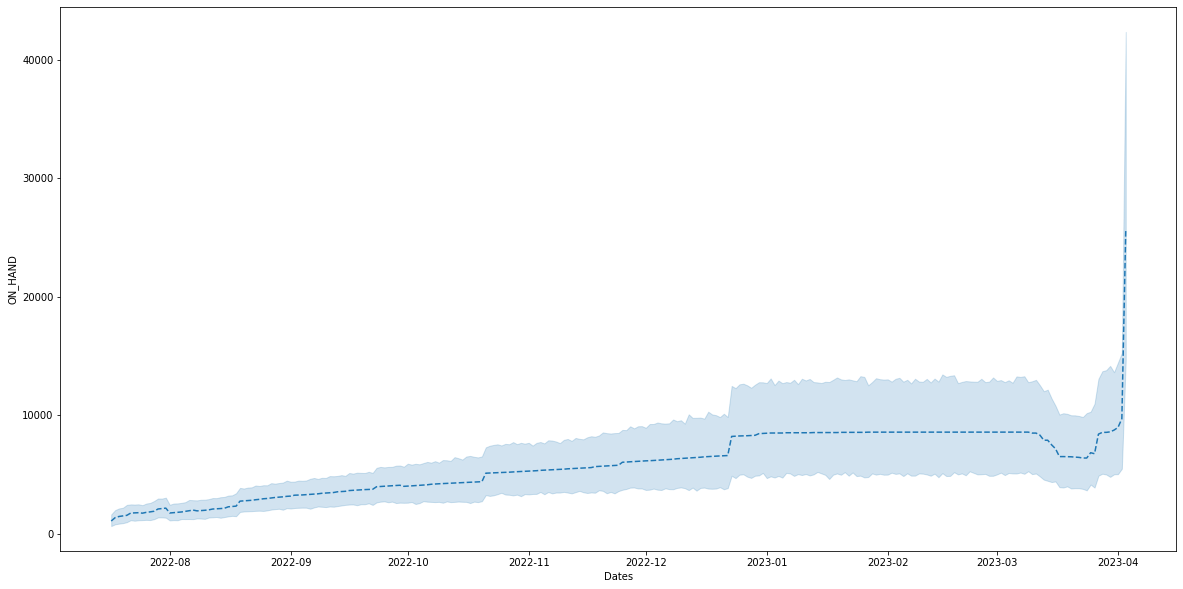

In [113]:
plt.figure(figsize = (20, 10))


sns.lineplot(x = df_gp['Dates'], y = df_gp['ON_HAND'], linestyle="dashed")
# plt.ylim(0, 10000)

In [116]:
df_gp

,Item_Code,Dates,ON_HAND
0,,2022-07-24,0.000000
1,,2022-07-25,0.000000
2,,2022-07-26,0.000000
3,,2022-07-27,0.000000
4,,2022-07-28,0.000000
...,...,...,...
120646,TBD,2023-03-22,14306.167805
120647,TBD,2023-03-23,14849.748289
120648,TBD,2023-03-24,14849.748289
120649,TBD,2023-03-25,13254.629631
